# Applications of Gaussian Process Regression to Portfolio Pricing.
* The purpose of this notebook is to demonstrate the fitting of a Gaussian Process Regression model (GP) to option price data. 
* In this notebook, European option prices are generated from the Black-Scholes model.  
* The notebook begins by building a GP model for call option, put option, bull spread, bear spread, straddle, strangle and butterfly spread. 
* In addition the notebook extends the code to account for more complex portfolios. 

## Library Imports

In [1]:
%load_ext autoreload

In [2]:
from BlackScholes import bsformula

import numpy as np
import scipy as sp

from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF

import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [3]:
%autoreload 2
from aux_functions import *

## Base Pricer

### Call Pricer

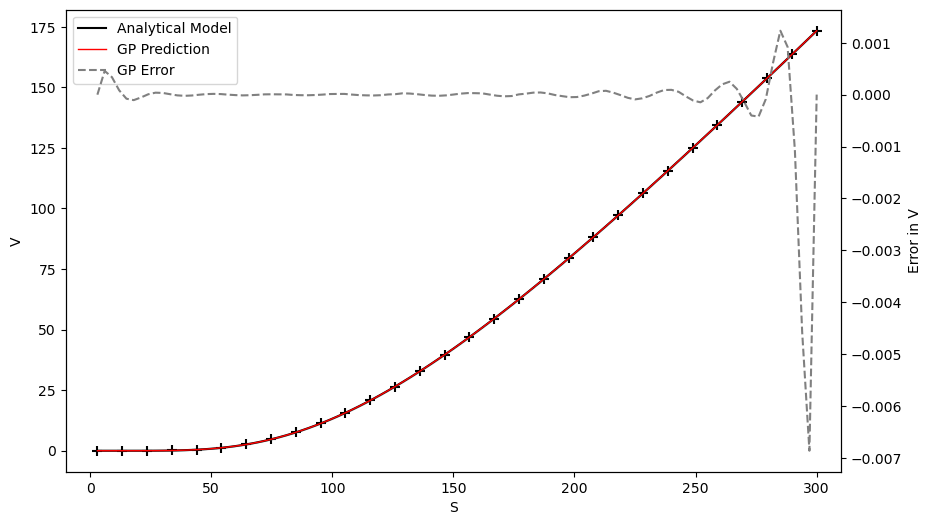

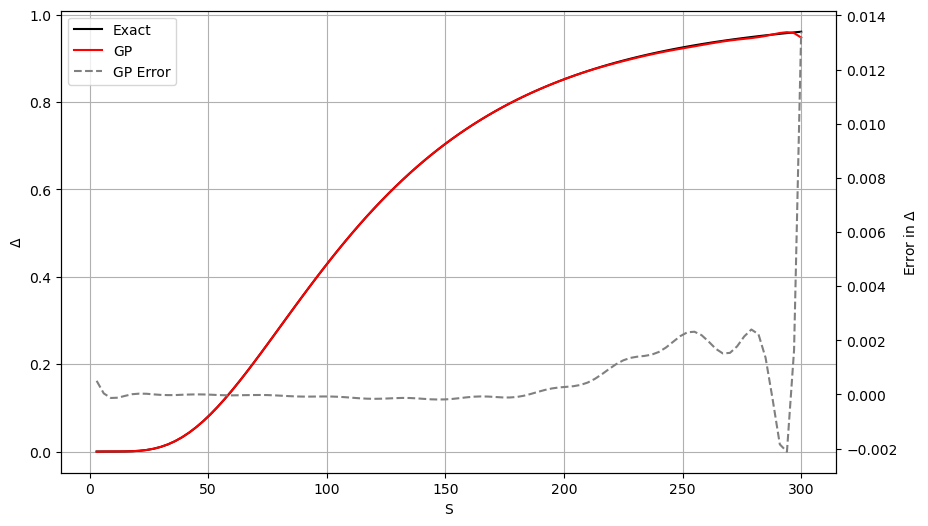

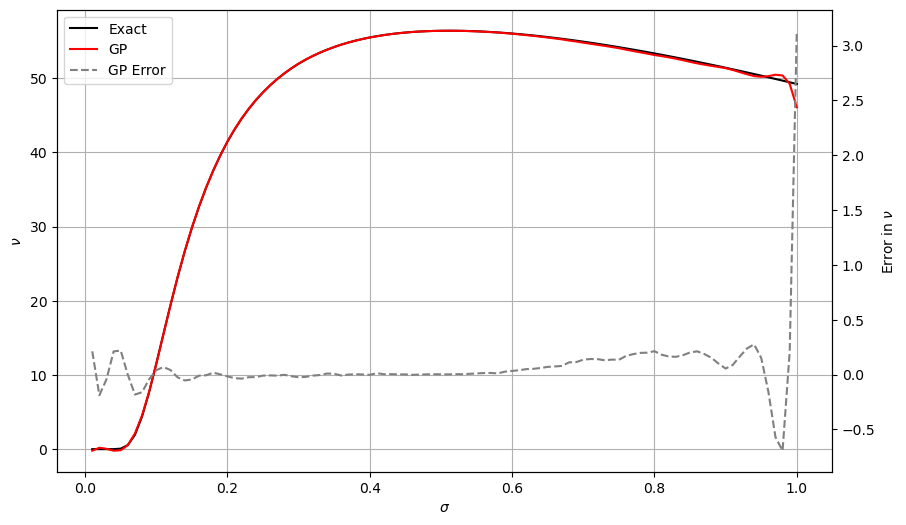

In [4]:
gp_call = GP_Call(lb = 0.001,
                  ub = 300,
                  training_number = 30,
                  testing_number = 100,
                  sigma=0.4,
                  S0=100,
                  strike = 130,
                  T=2,
                  r = 0.0002)
gp_call.gaussian_process()
gp_call.plot()
gp_call.delta_plot()
gp_call.vega_plot()

### Put Pricer

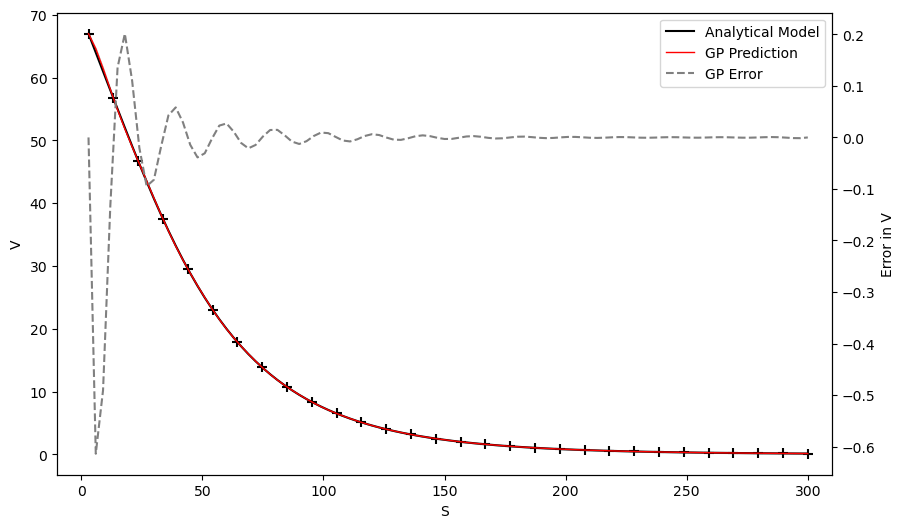

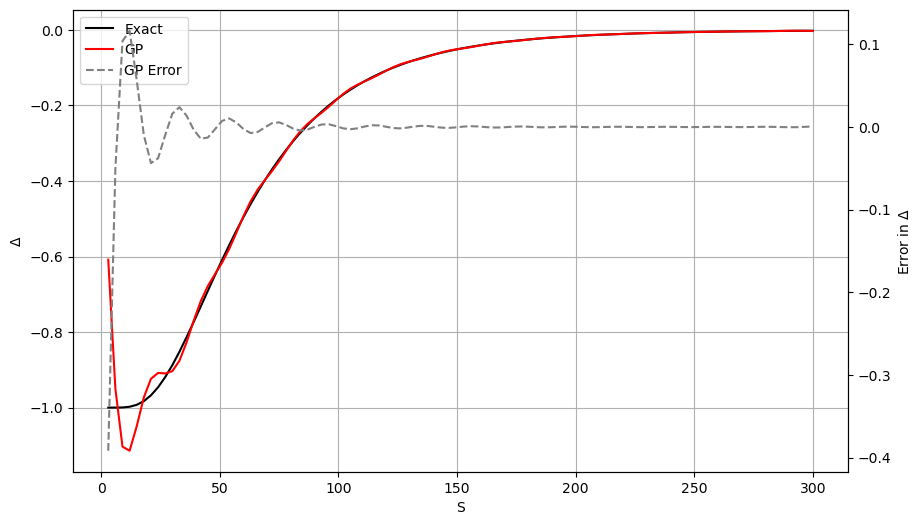

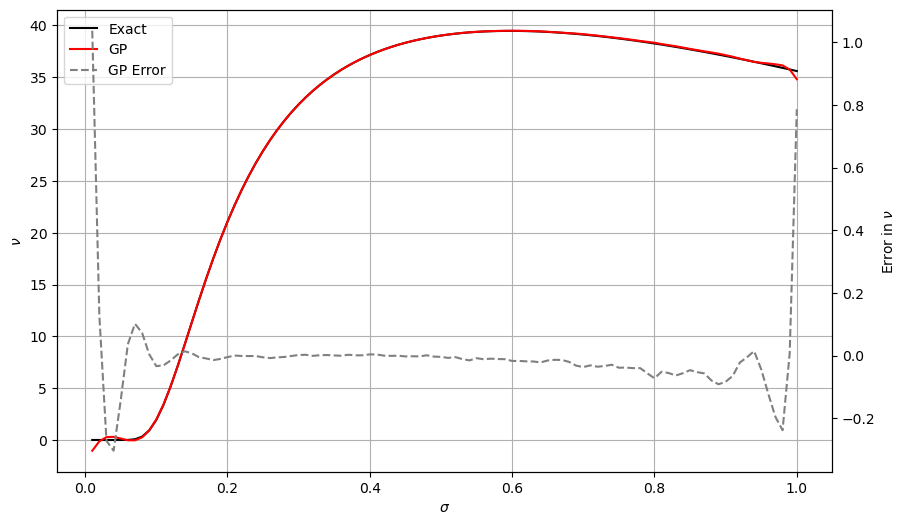

In [5]:
gp_put = GP_Put(lb = 0.001,
                  ub = 300,
                  training_number = 30,
                  testing_number = 100,
                  sigma=0.4,
                S0=100,
                  strike = 70,
                  T=2,
                  r = 0.0002)
gp_put.gaussian_process()
gp_put.plot()
gp_put.delta_plot()
gp_put.vega_plot()

### Bull Pricer

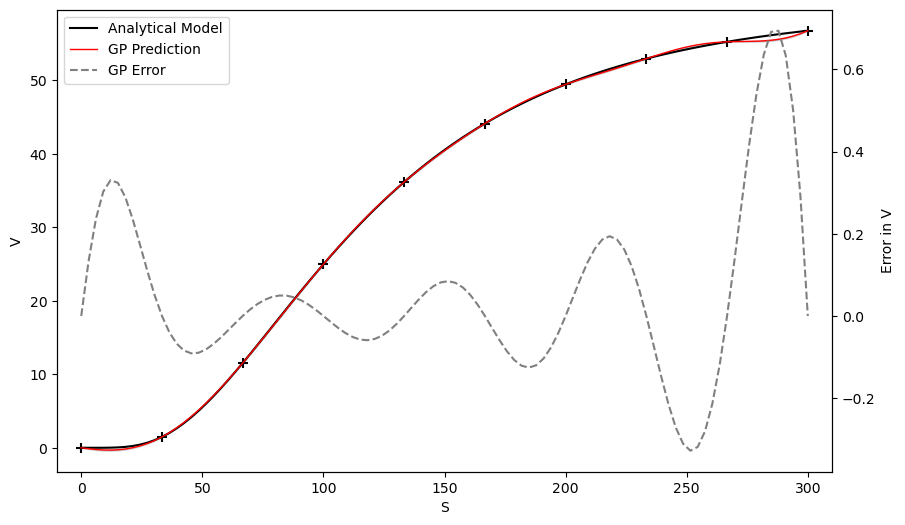

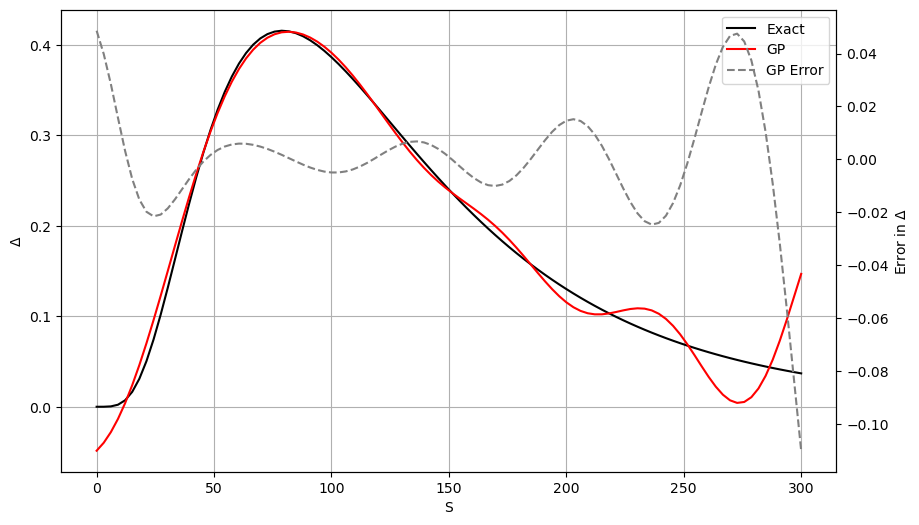

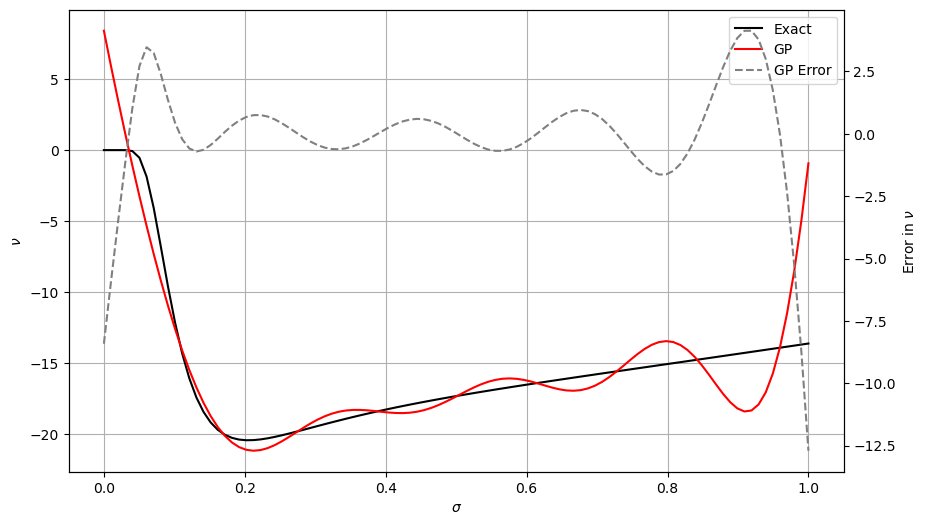

In [6]:
gp_bull = GP_Bull(lb = 0.001,
                  ub = 300,
                  training_number = 10,
                  testing_number = 100,
                  sigma=0.4,
                  S0=100,
                  strike_1 = 70,
                  strike_2 = 130,
                  T=2,
                  r = 0.0002, 
                 random_state=1)
gp_bull.gaussian_process()
gp_bull.plot()
gp_bull.delta_plot()
gp_bull.vega_plot()

### Bear Pricer

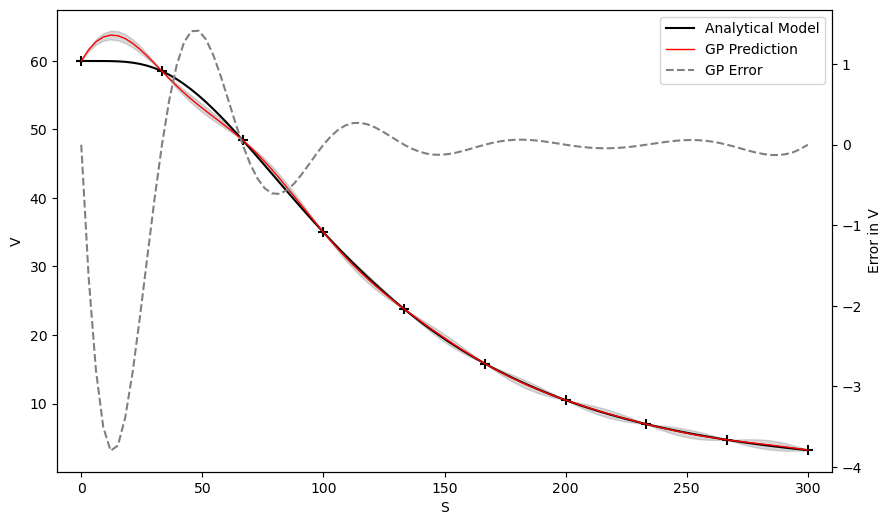

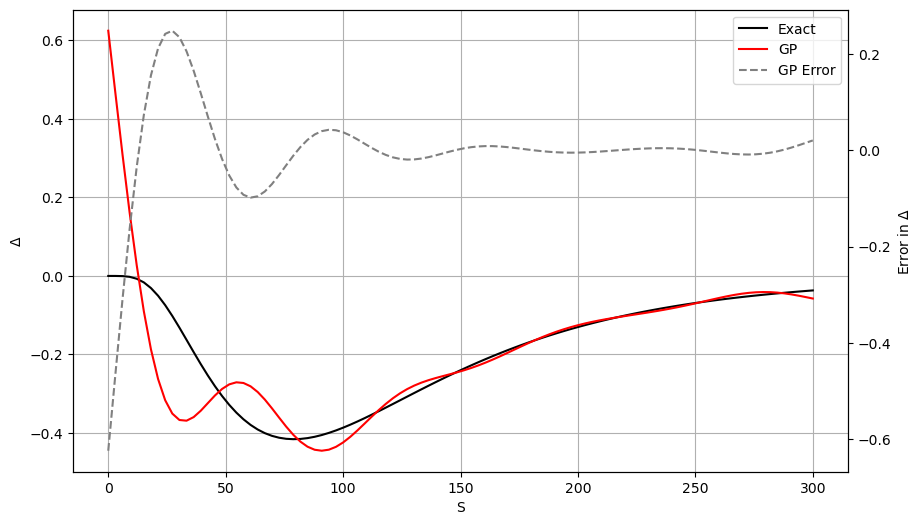

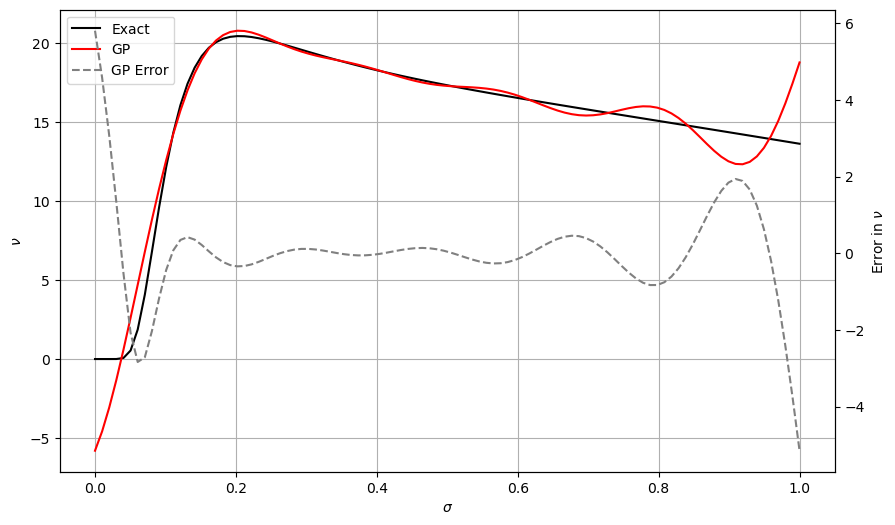

In [7]:
gp_bear = GP_Bear(lb = 0.001,
                  ub = 300,
                  training_number = 10,
                  testing_number = 100,
                  sigma=0.4,
                  S0=100,
                  strike_1 = 70,
                  strike_2 = 130,
                  T=2,
                  r = 0.0002)
gp_bear.gaussian_process()
gp_bear.plot()
gp_bear.delta_plot()
gp_bear.vega_plot()

### Straddle Pricer

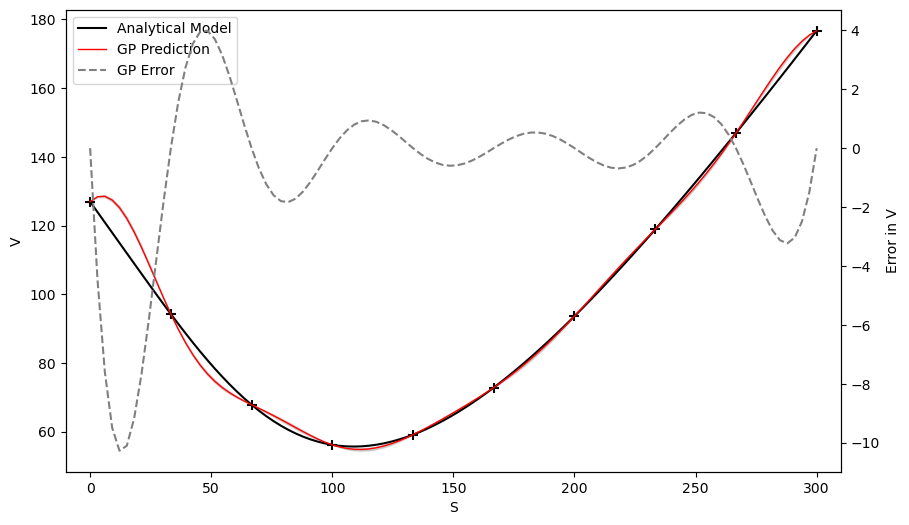

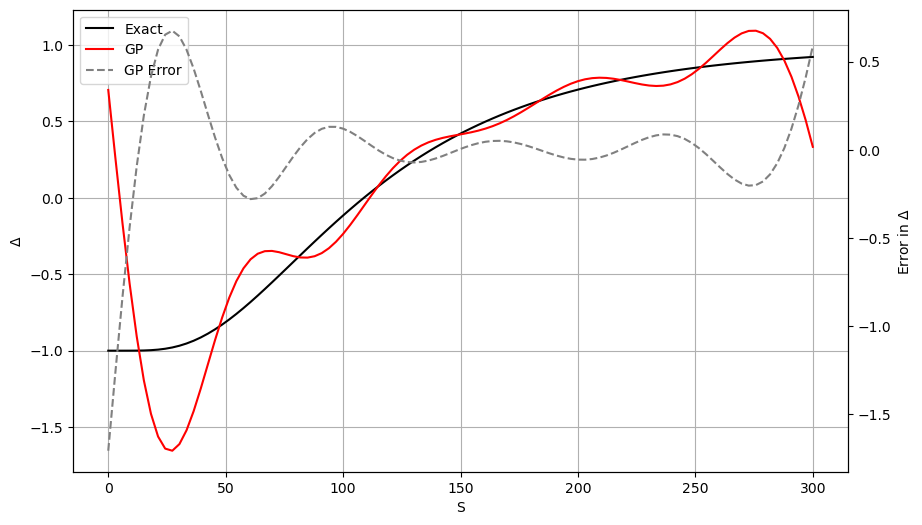

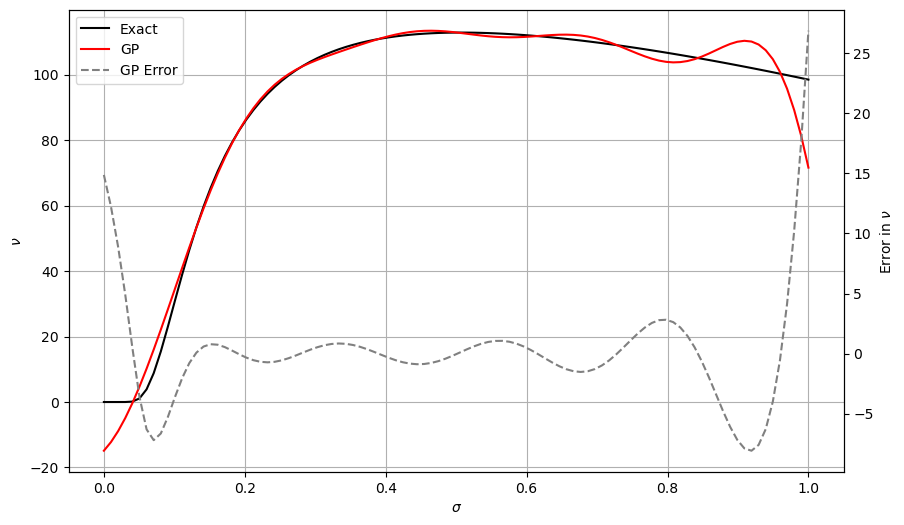

In [8]:
gp_straddle = GP_Straddle(lb = 0.001,
                  ub = 300,
                  training_number = 10,
                  testing_number = 100,
                  sigma=0.4,
                          S0=100,
                  strike = 130,
                  T=2,
                  r = 0.0002)
gp_straddle.gaussian_process()
gp_straddle.plot()
gp_straddle.delta_plot()
gp_straddle.vega_plot()


### Strangle Pricer

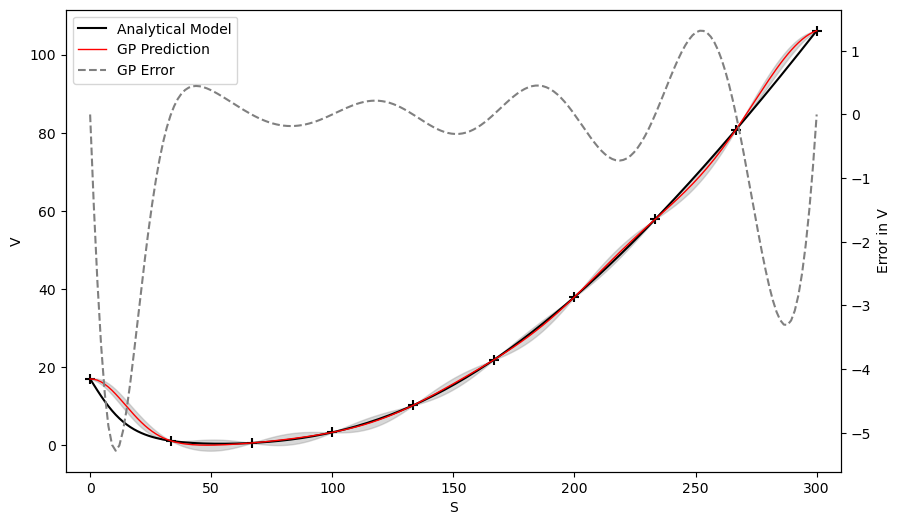

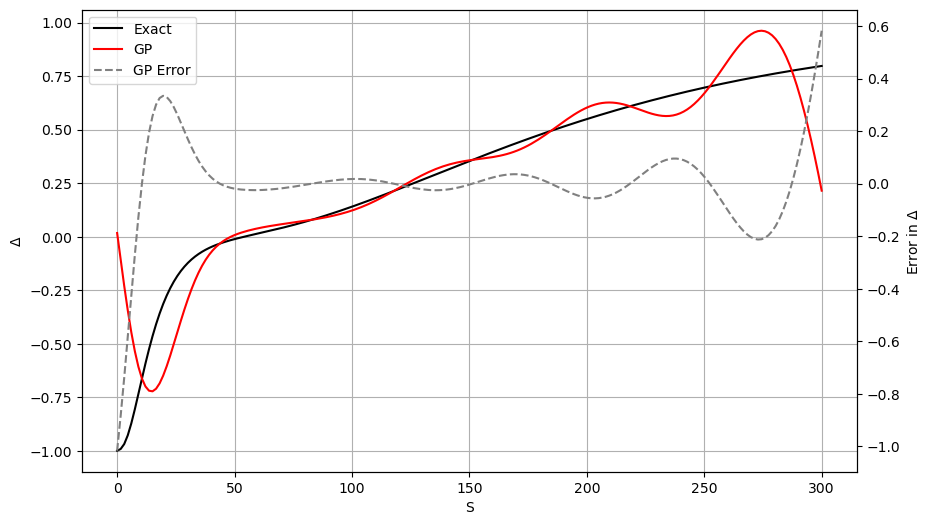

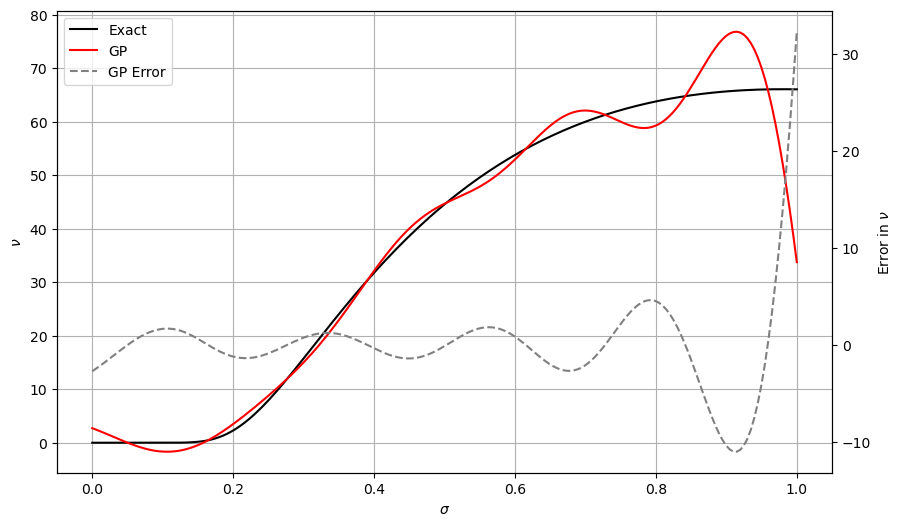

In [9]:
gp_strangle = GP_Strangle(lb = 0.001,
                  ub = 300,
                  training_number = 10,
                  testing_number = 200,
                  sigma=0.4,
                          S0=100,
                  strike_1 = 20,
                  strike_2 = 220,
                  T=2,
                  r = 0.0002)
gp_strangle.gaussian_process()
gp_strangle.plot()
gp_strangle.delta_plot()
gp_strangle.vega_plot()

### Butterfly Pricer

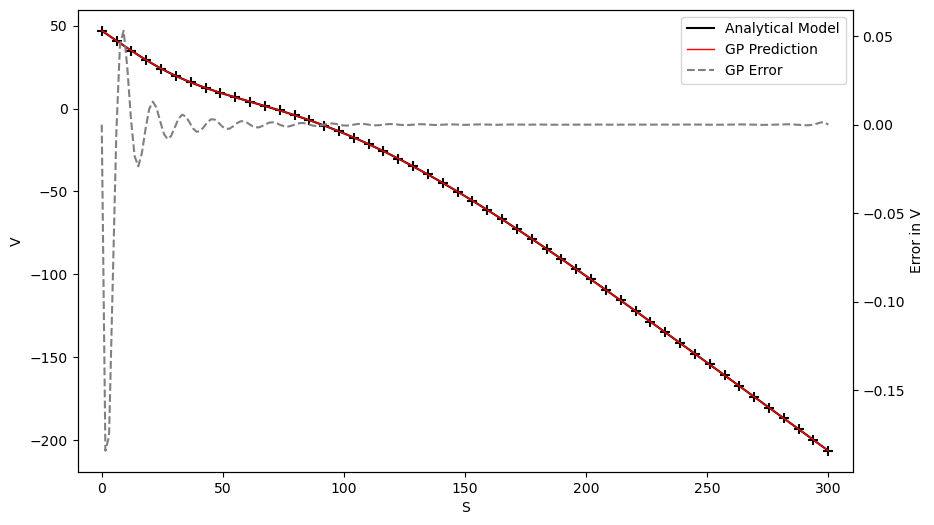

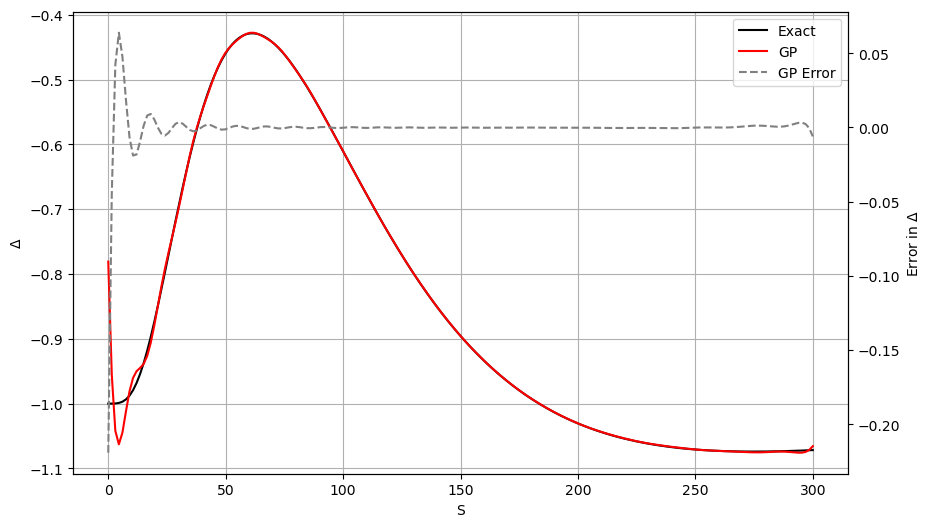

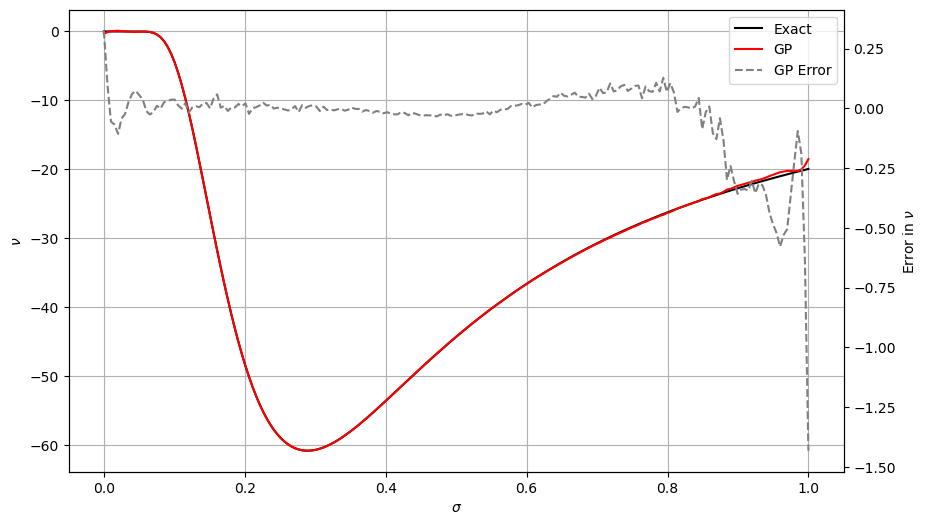

In [10]:
gp_butterfly = GP_Butterfly(lb = 0.001,
                  ub = 300,
                  training_number = 50,
                  testing_number = 200,
                  sigma=0.4,
                            S0=100,
                  strike_1 = 50,
                  strike_2 = 150,
                  strike_3 = 220,                           
                  T=2,
                  r = 0.0002)
gp_butterfly.gaussian_process()
gp_butterfly.plot()
gp_butterfly.delta_plot()
gp_butterfly.vega_plot()

## Portfolio

 Your portfolio is made up by 9 derivatives with the following characteristics:
   * Long a Put with Strike(s) 70 with Underlying Spot 100, time to maturity 2, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Long a Call with Strike(s) 130 with Underlying Spot 100, time to maturity 2, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Long a Bull with Strike(s) 70,130.0 with Underlying Spot 100, time to maturity 10, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Long a Bear with Strike(s) 70,130.0 with Underlying Spot 100, time to maturity 5, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Long a Straddle with Strike(s) 130 with Underlying Spot 100, time to maturity 3, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Long a Strangle with Strike(s) 20,220.0 with Underlying Spot 100, time to maturity 7, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Short a Butterfly with Strike

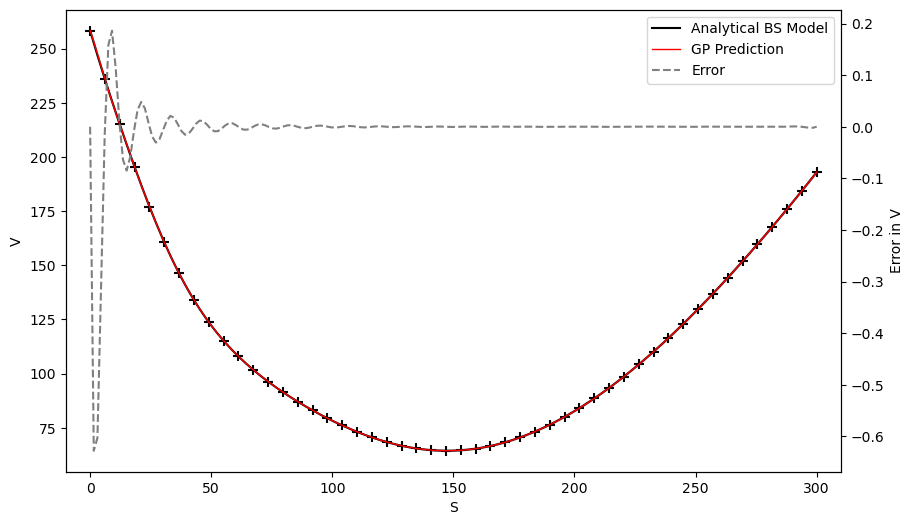

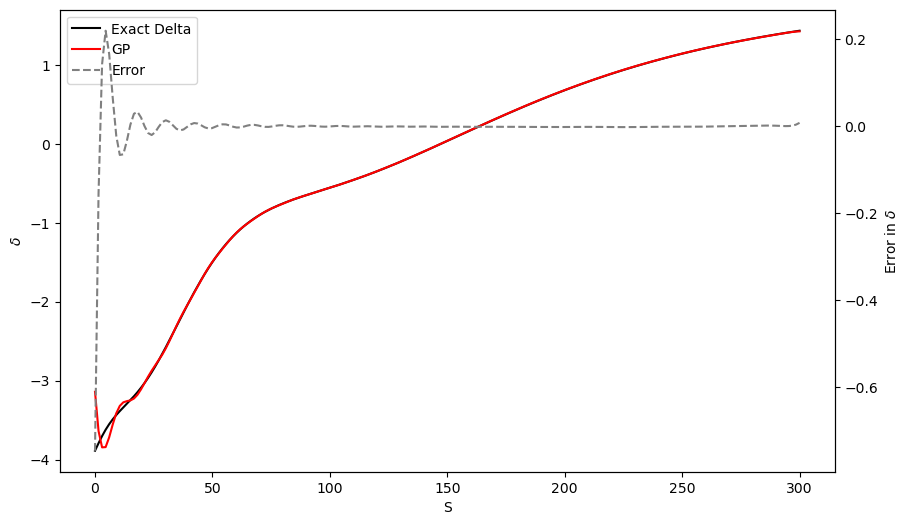

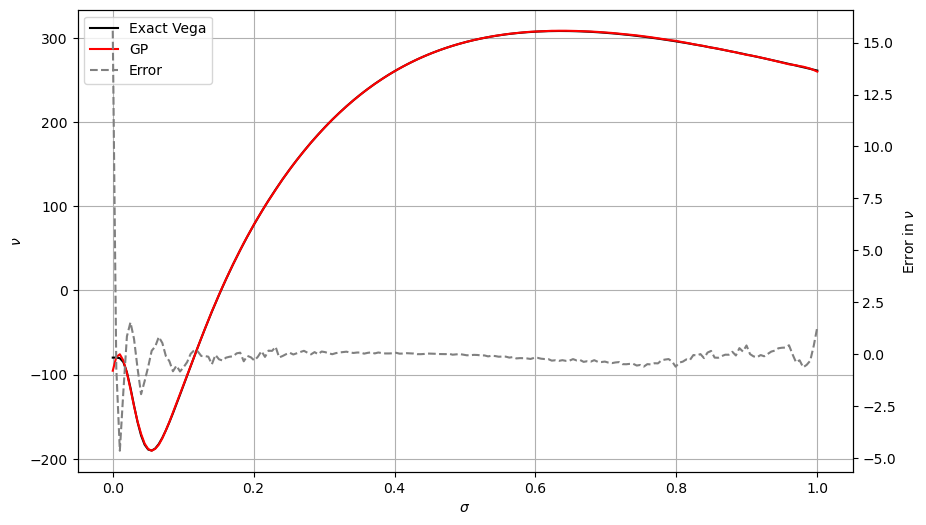

In [11]:
port = Portfolio(path='portfolio.txt',
                lb = 0.001,
                 ub = 300,
                 training_number = 50,
                 testing_number = 200,
                 n_restarts_optimizer=100,
                 length_scale=1.0,
                 length_scale_bounds=(1e-05, 10000.0),
                 random_state=0)
print(port)
port.evaluate_portafolio()
port.compute_aggregate()
port.plot()
port.delta_plot()
port.vega_plot()

## Class' Portfolio

 Your portfolio is made up by 3 derivatives with the following characteristics:
   * Short a Put with Strike(s) 70 with Underlying Spot 100, time to maturity 2, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Long a Call with Strike(s) 130 with Underlying Spot 100, time to maturity 2, risk-free interest rate of 0.0002 and implied volatility 0.4.
   * Long a Call with Strike(s) 130 with Underlying Spot 100, time to maturity 2, risk-free interest rate of 0.0002 and implied volatility 0.4.



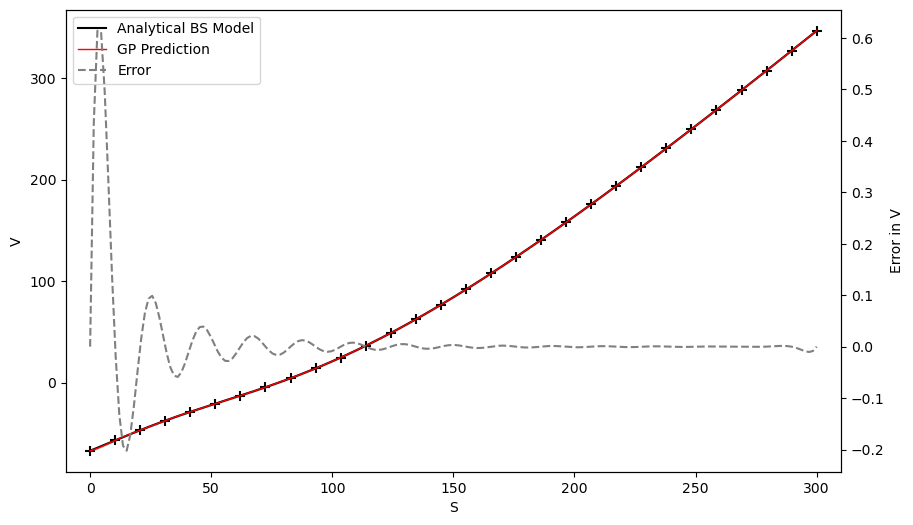

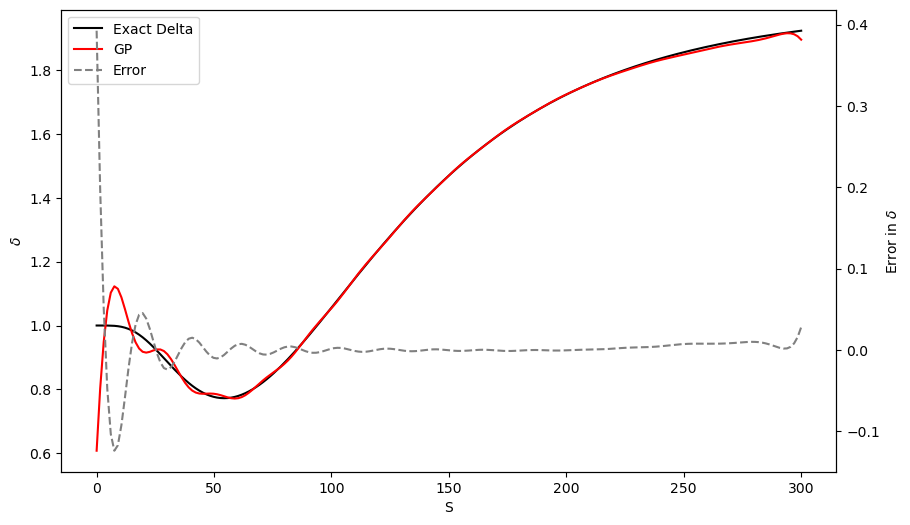

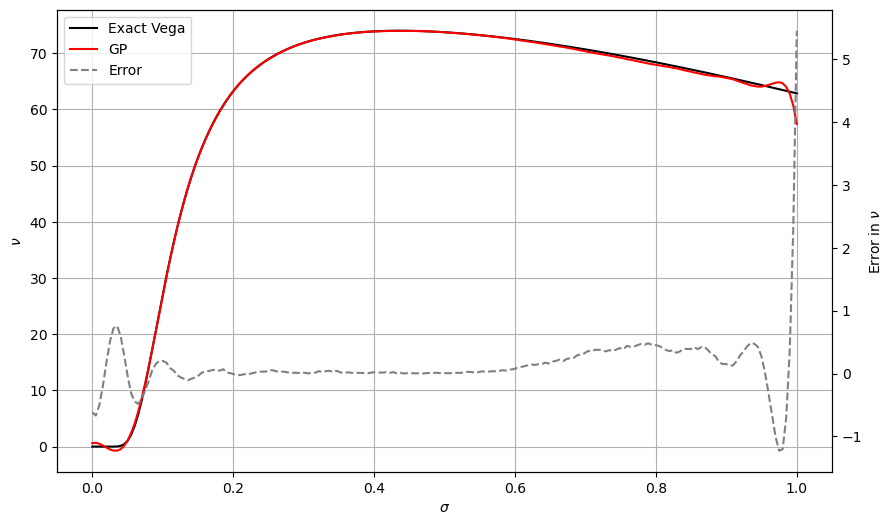

In [12]:
port_class = Portfolio(path='portfolio_class.txt',
                lb = 0.001,
                 ub = 300,
                 training_number = 30,
                 testing_number = 200,
                 n_restarts_optimizer=100,
                 length_scale=1.0,
                 length_scale_bounds=(1e-05, 10000.0),
                 random_state=0)
print(port_class)
port_class.evaluate_portafolio()
port_class.compute_aggregate()
port_class.plot()
port_class.delta_plot()
port_class.vega_plot()